# alphavantage

In [129]:
import requests
import pandas as pd

url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics=energy_transportation&apikey=1T1WBOZ2CDTI75YV'
r = requests.get(url)
data = r.json()
data.keys()

dict_keys(['Information'])

In [123]:
print(f'number of articles ' + data['items'])

number of articles 50


In [124]:
for x_range in data['sentiment_score_definition'].split(';'):
    print(x_range)
print('\n')
print(f'Note: ' + data['relevance_score_definition'])

x <= -0.35: Bearish
 -0.35 < x <= -0.15: Somewhat-Bearish
 -0.15 < x < 0.15: Neutral
 0.15 <= x < 0.35: Somewhat_Bullish
 x >= 0.35: Bullish


Note: 0 < x <= 1, with a higher score indicating higher relevance.


In [128]:
feed_list = data['feed']
feed_df = pd.json_normalize(feed_list)
feed_df.head(1)

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment
0,"Ahead of Budget, hospitality players demand in...",https://www.business-standard.com/budget/news/...,20240707T065841,[Press Trust of India],Chalet Hotels Ltd Managing Director and CEO Sa...,https://bsmedia.business-standard.com/_media/b...,Business Standard,GoogleRSS,www.business-standard.com,"[{'topic': 'Energy & Transportation', 'relevan...",0.368883,Bullish,"[{'ticker': 'WM', 'relevance_score': '0.050148..."


In [107]:
relevance = {}
for feed in (feed_df['topics']):
    for json in feed:
        if json['topic'] not in relevance.keys():
            relevance[json['topic']] = []
        relevance[json['topic']].append(json['relevance_score'])

In [119]:
"""
Supported topics:

Blockchain: blockchain
Earnings: earnings
IPO: ipo
Mergers & Acquisitions: mergers_and_acquisitions
Financial Markets: financial_markets
Economy - Fiscal Policy (e.g., tax reform, government spending): economy_fiscal
Economy - Monetary Policy (e.g., interest rates, inflation): economy_monetary
Economy - Macro/Overall: economy_macro
Energy & Transportation: energy_transportation
Finance: finance
Life Sciences: life_sciences
Manufacturing: manufacturing
Real Estate & Construction: real_estate
Retail & Wholesale: retail_wholesale
Technology: technology
"""

'\nSupported topics:\n\nBlockchain: blockchain\nEarnings: earnings\nIPO: ipo\nMergers & Acquisitions: mergers_and_acquisitions\nFinancial Markets: financial_markets\nEconomy - Fiscal Policy (e.g., tax reform, government spending): economy_fiscal\nEconomy - Monetary Policy (e.g., interest rates, inflation): economy_monetary\nEconomy - Macro/Overall: economy_macro\nEnergy & Transportation: energy_transportation\nFinance: finance\nLife Sciences: life_sciences\nManufacturing: manufacturing\nReal Estate & Construction: real_estate\nRetail & Wholesale: retail_wholesale\nTechnology: technology\n'

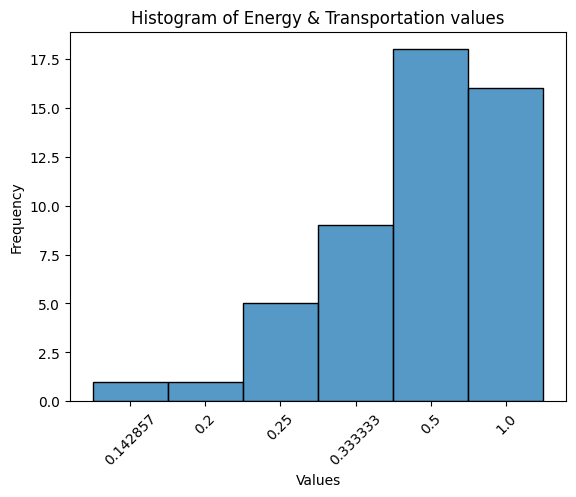

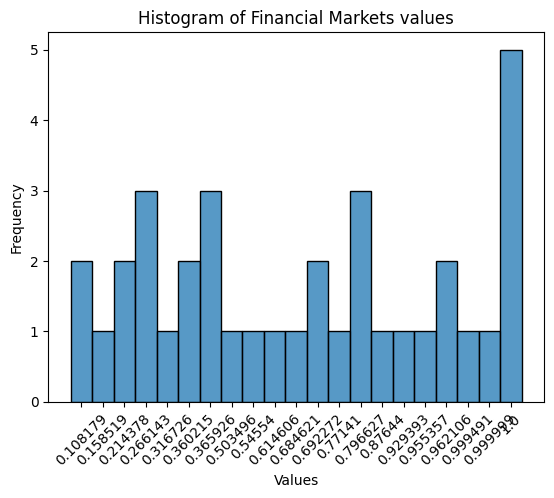

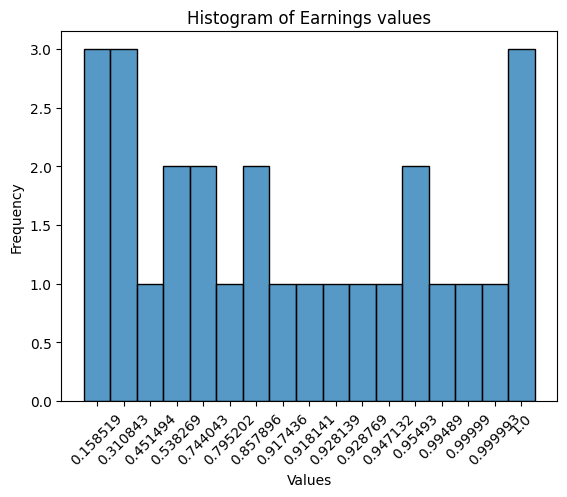

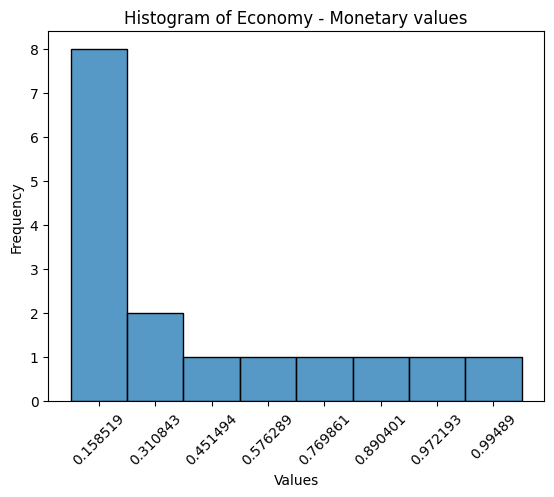

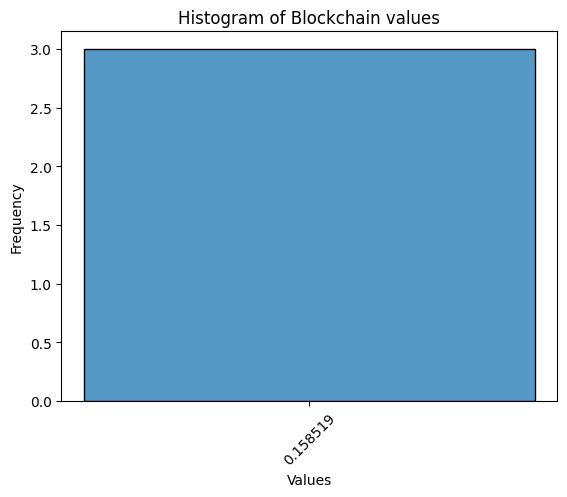

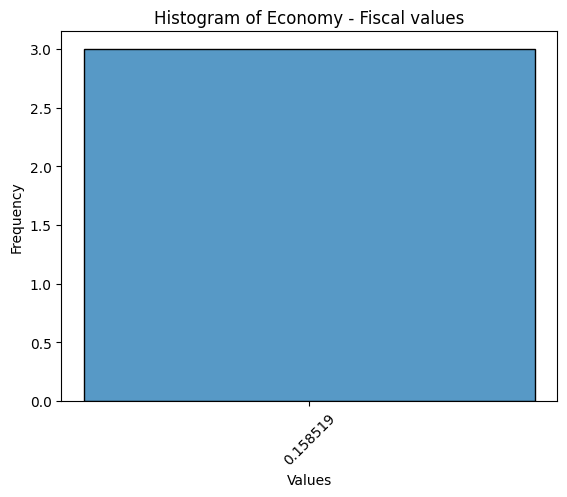

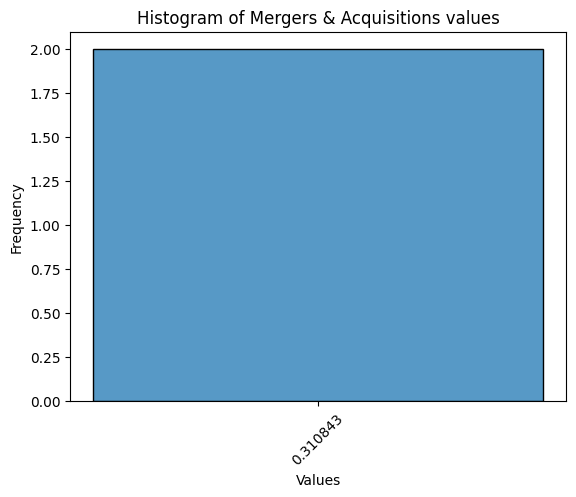

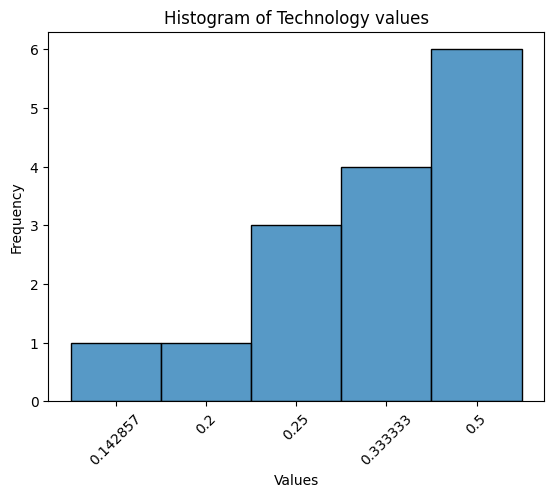

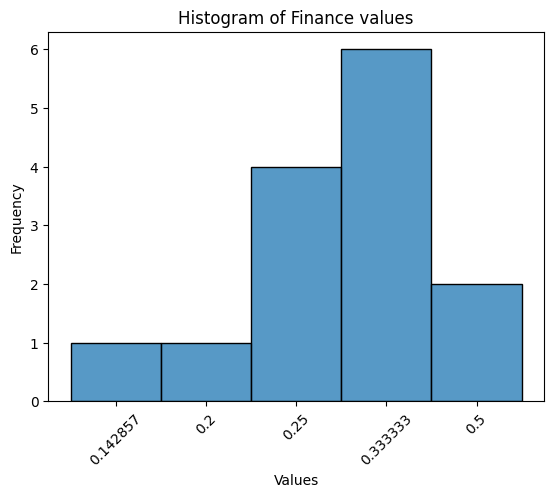

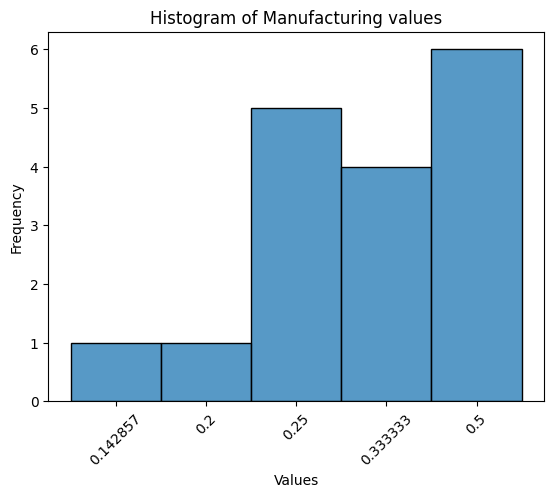

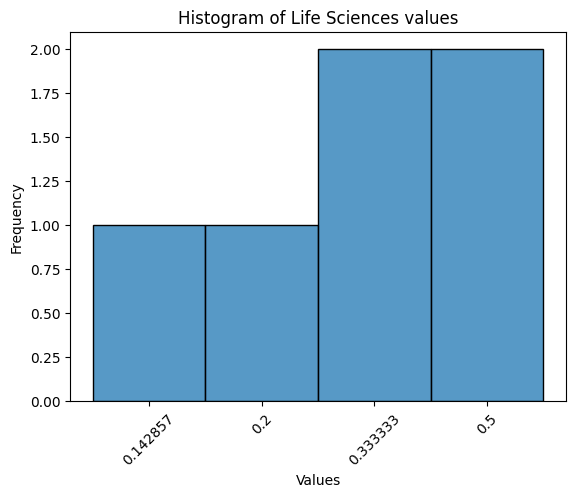

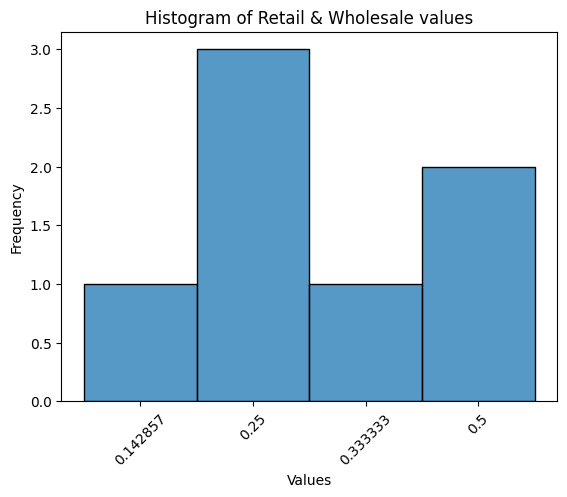

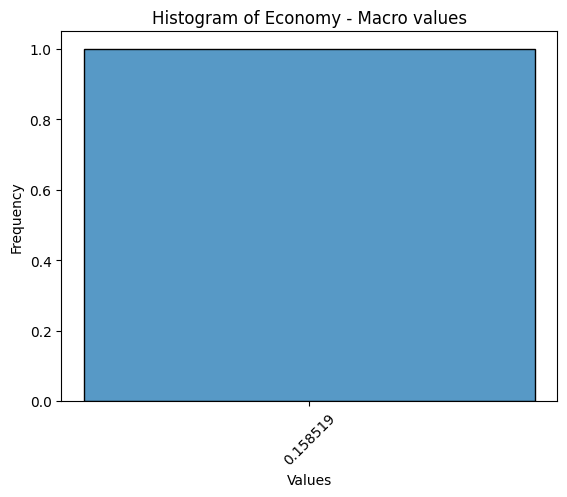

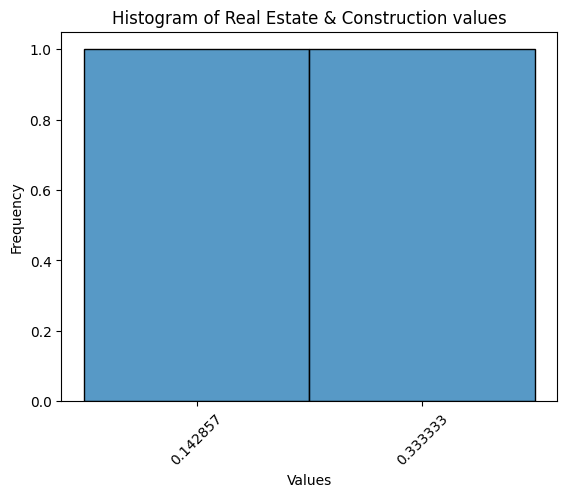

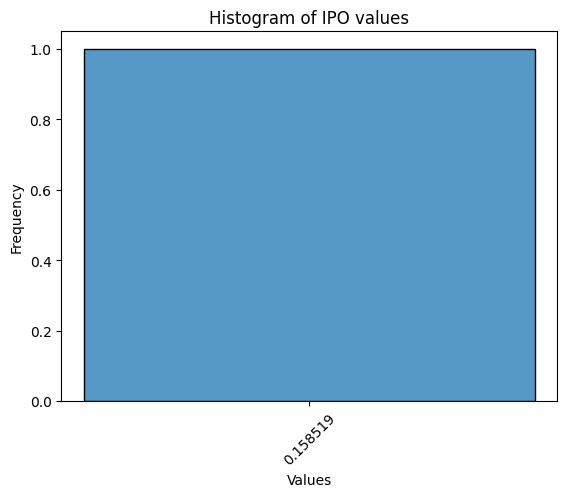

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

for key, values in relevance.items():
    sns.histplot(sorted(values))
    plt.title(f"Histogram of {key} values")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

# Finnhub

In [133]:
pip install finnhub-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import finnhub
finnhub_client = finnhub.Client(api_key="cq2hh21r01ql95ncplg0cq2hh21r01ql95ncplgg")


In [166]:

# general_news = finnhub_client.general_news('general', min_id=0)
general_news = finnhub_client.company_news('META', _from="2020-06-01", to="2024-07-07")
general_news_df = pd.json_normalize(general_news)
print(f'{general_news_df.shape[0]} records in the dataset')
general_news_df.head()

226 records in the dataset


,category,datetime,headline,id,image,related,source,summary,url
0,company,1720332900,The Stock Market Is In One Giant Trade That Is...,128613526,https://static.seekingalpha.com/cdn/s3/uploads...,META,SeekingAlpha,S&P 500 rally is driven by concentrated index ...,https://finnhub.io/api/news?id=ffb16930271e46d...
1,company,1720293300,"How to set up parental controls on Facebook, S...",128610226,https://techcrunch.com/wp-content/uploads/2024...,META,Yahoo,Parental controls are offered by almost every ...,https://finnhub.io/api/news?id=b3b0d640b4ff327...
2,company,1720262100,Amazon Is Now the Best-Performing Stock in the...,128607078,https://g.foolcdn.com/editorial/images/782381/...,META,Yahoo,Amazon's impeccable results largely justify th...,https://finnhub.io/api/news?id=3050b7d09972d8a...
3,company,1720230749,Snapchat: Snapchat+ Key To Profits,128604989,https://static.seekingalpha.com/cdn/s3/uploads...,META,SeekingAlpha,Snapchat's subscription service has boosted re...,https://finnhub.io/api/news?id=22ce5d2aa705f73...
4,company,1720213610,S&P 500 Gains and Losses Today: Meta Soars as ...,128602032,https://www.investopedia.com/thmb/SnhsF-XKtgyD...,META,Yahoo,"The S&P 500 added 0.5% on Friday, June 5, 2024...",https://finnhub.io/api/news?id=1d367a8066a6e75...


# BBC News (Kaggle)

In [169]:
import pandas as pd

# Read the CSV file
bbc_news = pd.read_csv('bbc_news.csv')
bbc_news.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


# News_Category_Dataset_v3 (Kaggle)

In [178]:
import pandas as pd

news_category_dataset = pd.read_json('News_Category_Dataset_v3.json', lines=True)
news_category_dataset.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


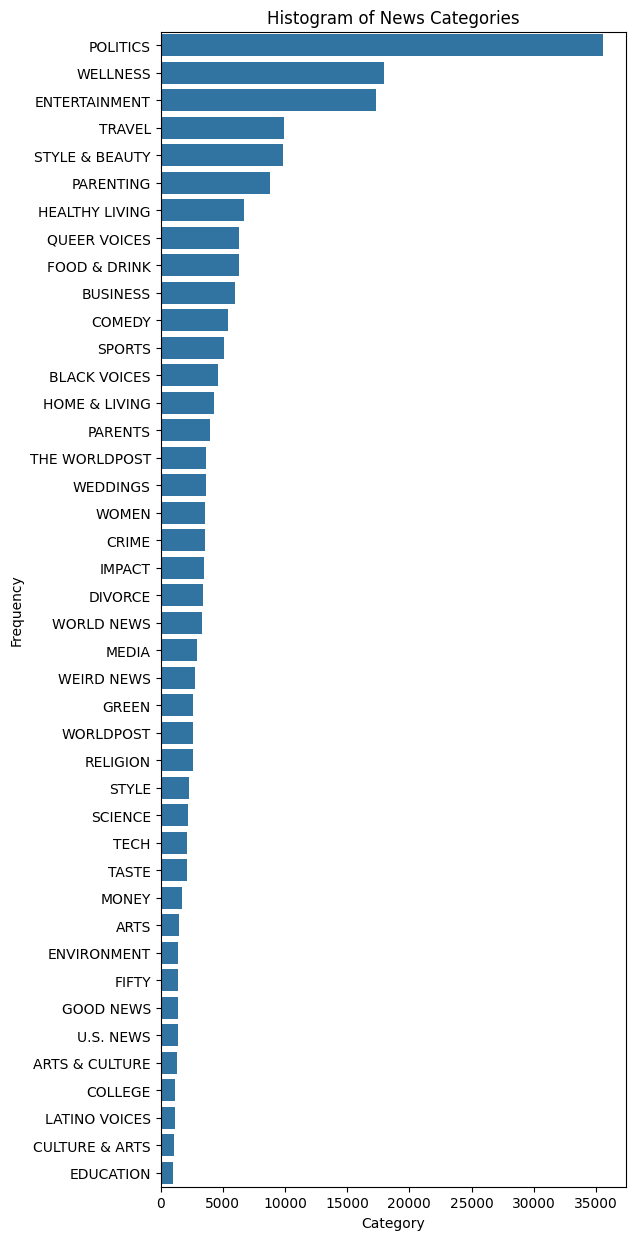

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each category
category_counts = news_category_dataset['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Sort the categories by their frequency
sorted_category_counts = category_counts.sort_values(by='count', ascending=False)

# Plot the sorted categories using Seaborn
plt.figure(figsize=(6, 15))
sns.barplot(y='category', x='count', data=sorted_category_counts)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of News Categories')
plt.show()